In [1]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importing data

In [2]:
df= pd.read_excel("C:/Users/Admin/Desktop/Data science project/Project 2/Office Supplies Orders Case Study Data.xlsx","Data")
df #importing Data set

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [3]:
df.info() #understandind type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   Postal Code     9994 non-null   float64       
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [4]:
df.describe(percentiles=[0.25,0.50,0.75,0.95,0.01])

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
1%,2149.000000,3.690000,1.000000,0.000000,-351.505650,1.110000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
95%,98006.000000,1015.955640,8.000000,0.600000,211.500000,111.409500
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Filling blank data

In [5]:
mode_pin = df["Postal Code"].mode()   #filling blank cell
mode_pin

0    10035.0
dtype: float64

In [6]:
df["Postal Code"].fillna(10035.0,inplace=True)

In [7]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,10035.0,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,10035.0,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,10035.0,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,10035.0,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,10035.0,Kure,Hiroshima,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,10035.0,Valinhos,São Paulo,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [8]:
df["Postal Code"].astype(str)

0        73120.0
1        10035.0
2        10035.0
3        10035.0
4        10035.0
          ...   
51285    10035.0
51286    37421.0
51287    94109.0
51288    10035.0
51289    10035.0
Name: Postal Code, Length: 51290, dtype: object

# Data Analysis

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,18833.652018,246.490581,3.476545,0.142908,28.610982,26.478567
std,22807.995075,487.565361,2.278766,0.212280,174.340972,57.251373
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,10035.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,10035.000000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,10035.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Numerical features plot

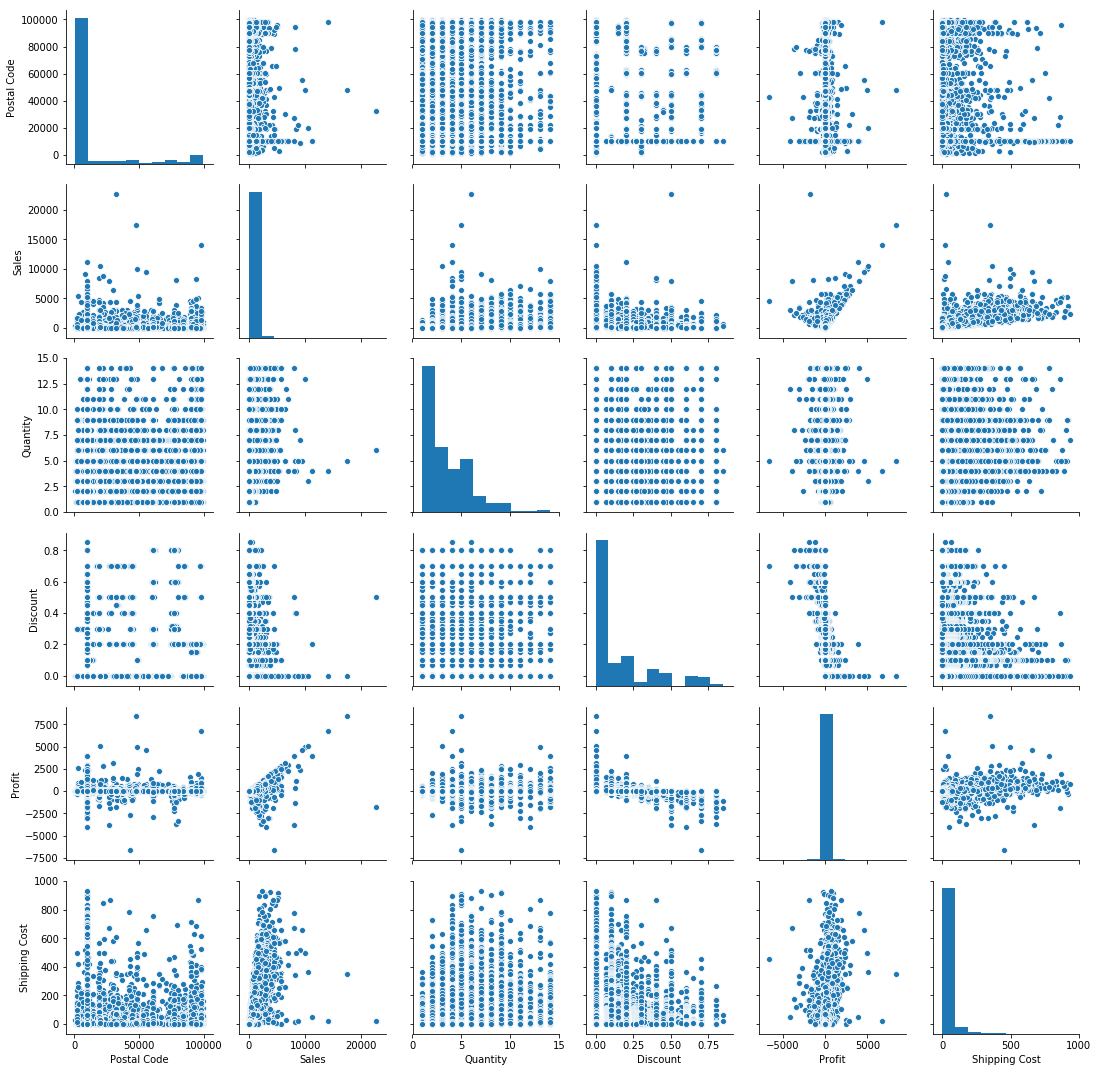

In [10]:
sns.pairplot(data = df) #finding the relationship between datas


### Co-Relation matrix

In [11]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Postal Code,1.000000,-0.021512,0.056406,0.039730,-0.010925,-0.023779
Sales,-0.021512,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,0.056406,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.039730,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,-0.010925,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,-0.023779,0.767835,0.271804,-0.078153,0.354423,1.000000


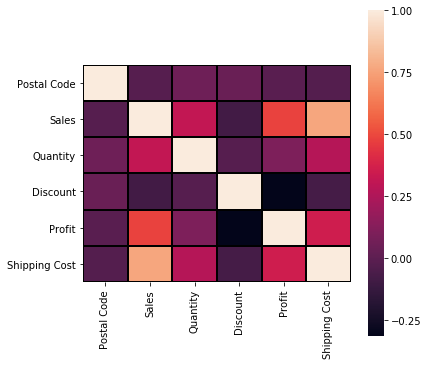

In [12]:
sns.heatmap(df.corr(),linewidths=1,linecolor="Black",cbar_kws={"shrink":1.5})


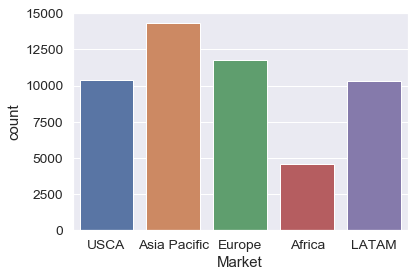

In [13]:
sns.set(font_scale=1.25
       )
sns.countplot(x=df["Market"]) #analysing region wise sale

In [14]:
df["Segment"].count()

51290

In [15]:
segment_count=pd.DataFrame(df.Segment.value_counts())
segment_count

,Segment
Consumer,26518
Corporate,15429
Home Office,9343


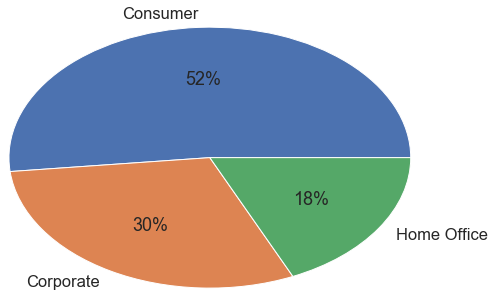

In [16]:
sns.set(font_scale=1.5)
plt.pie(segment_count["Segment"],labels=df["Segment"].unique(),radius=1.5,autopct='%.0f%%'); #analyzing the market share of each segment using pie chart



In [115]:
pd.set_option('display.float_format', '{:.2f}'.format)
sales_segment=pd.pivot_table(data=df,values="Sales",index="Segment",aggfunc=[np.sum])
sales_segment

,sum
,Sales
Segment,
Consumer,6507949.42
Corporate,3824697.52
Home Office,2309854.97


In [135]:
df_loss1=df[df.Profit<0].pivot_table(values="Profit",index=("Category","Sub-Category"),aggfunc="sum") #analysing loss in each category and sub category
df_loss1

Profit
Category        Sub-Category           
Furniture       Bookcases    -101446.30
                Chairs        -96084.90
                Furnishings   -28490.72
                Tables       -144123.15
Office Supplies Appliances    -63985.35
                Art           -21660.63
                Binders       -52884.06
                Envelopes     -10863.57
                Fasteners      -6314.90
                Labels         -3760.77
                Paper         -10299.49
                Storage       -76063.98
                Supplies      -18172.96
Technology      Accessories   -39857.50
                Copiers       -71547.50
                Machines      -78672.74
                Phones        -96417.66

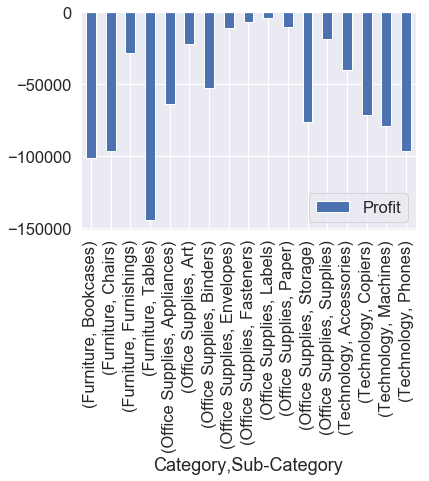

In [134]:
df_loss1.plot(kind="bar");
#visualising the loss








In [137]:
df_loss2=df[df.Profit<0].pivot_table(values="Profit",index=("Segment","Category"),aggfunc="sum")
df_loss2

Profit
Segment     Category                  
Consumer    Furniture       -187200.64
            Office Supplies -144071.23
            Technology      -146085.54
Corporate   Furniture       -113555.62
            Office Supplies  -72787.95
            Technology       -88745.53
Home Office Furniture        -69388.81
            Office Supplies  -47146.52
            Technology       -51664.33

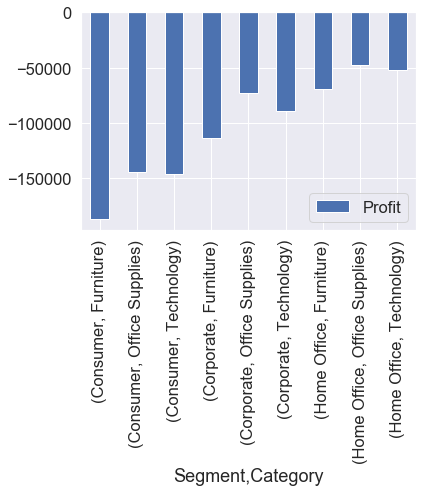

In [136]:
df_loss2.plot(kind="bar")

In [138]:
df_loss3=df[df.Profit<0].pivot_table(values="Profit",index=("Market","Segment"),aggfunc="sum")
df_loss3

Profit
Market       Segment               
Africa       Consumer     -47681.21
             Corporate    -26303.12
             Home Office  -14890.71
Asia Pacific Consumer    -156814.29
             Corporate    -93948.05
             Home Office  -63905.21
Europe       Consumer    -101808.61
             Corporate    -59601.54
             Home Office  -33744.97
LATAM        Consumer     -86107.59
             Corporate    -50449.18
             Home Office  -29260.40
USCA         Consumer     -84945.71
             Corporate    -44787.21
             Home Office  -26398.37

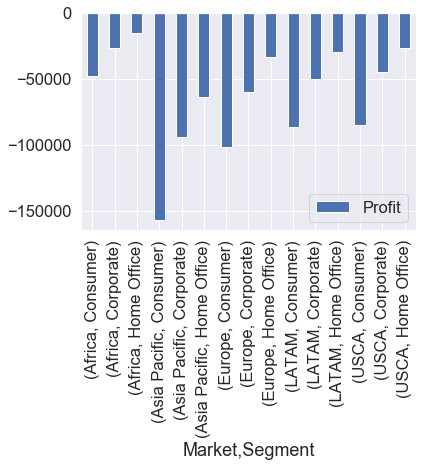

In [139]:
df_loss3.plot(kind="bar")

#visulixation of loss data as per market and segment




In [142]:
pd.set_option('display.float_format', '{:.2f}'.format)   #changing format of number
df_monthly_sale=df.pivot_table(values="Sales",index="Order Date",aggfunc="sum").sort_values(by="Order Date") #applying pivot to summarize data
df_yearly_sale=df_monthly_sale.resample("YS").sum()  #resampling the data in yearly format 
df_yearly_sale

,Sales
Order Date,
2012-01-01,2259450.90
2013-01-01,2677438.69
2014-01-01,3405746.45
2015-01-01,4299865.87


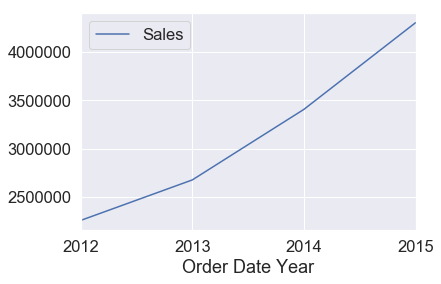

In [132]:
df_monthly_sale.resample("YS").sum().plot() #yearly sales 
plt.xlabel("Order Date Year")
plt.ylabel=("Sales")

In [146]:
df_yearly_sale["Sales Growth Rate"]=df_yearly_sale["Sales"].pct_change()*100 #calculate Growth rate
df_yearly_sale.fillna(0,inplace=True) #filling data with 0
df_yearly_sale


,Sales,Sales Growth Rate
Order Date,,
2012-01-01,2259450.90,0.00
2013-01-01,2677438.69,18.50
2014-01-01,3405746.45,27.20
2015-01-01,4299865.87,26.25


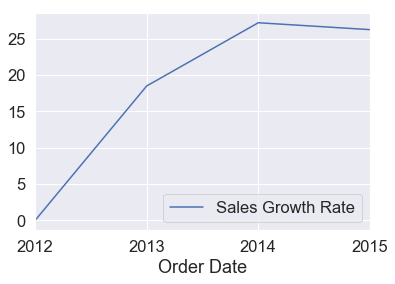

In [145]:
df_yearly_sale.plot(y="Sales Growth Rate")
#plotting graph for sales growth 

In [147]:
df_monthly_profit=df.pivot_table(
    values="Profit",
    index="Order Date",
    aggfunc="sum").sort_values(
    by="Order Date") 

#applying pivot table in data


df_yearly_profit=df_monthly_profit.resample(
    "YS").sum()
#resapling of data for yearly profit


df_yearly_profit[
    "Profit Growth Rate"]=df_yearly_profit[
    "Profit"].pct_change()*100
#yearly growth rate in profit


df_yearly_profit.fillna(0,inplace=True)
#filling null value with 0

df_yearly_profit






,Profit,Profit Growth Rate
Order Date,,
2012-01-01,248940.81,0.00
2013-01-01,307415.28,23.49
2014-01-01,406935.23,32.37
2015-01-01,504165.97,23.89


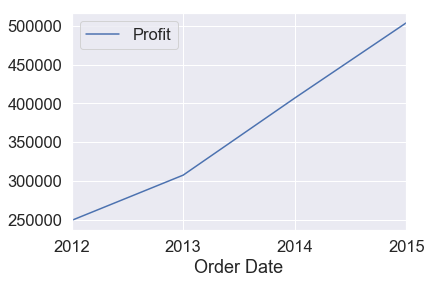

In [109]:
df_yearly_profit.plot(y="Profit")

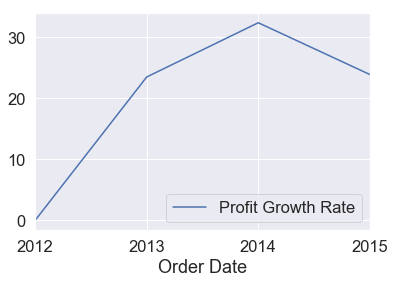

In [110]:
df_yearly_profit.plot(y="Profit Growth Rate")

In [112]:
pd.set_option(
    'display.float_format', '{:.2f}'.format)

df_quarterly_sale=df_monthly_sale.resample(
    "QS").sum()

df_quarterly_sale







,Sales
Order Date,
2012-01-01,338362.81
2012-04-01,480132.84
2012-07-01,611085.92
2012-10-01,829869.33
2013-01-01,399367.71
2013-04-01,625592.86
2013-07-01,737768.89
2013-10-01,914709.23
2014-01-01,565019.59


Text(0.5,0,'Order Quartely')

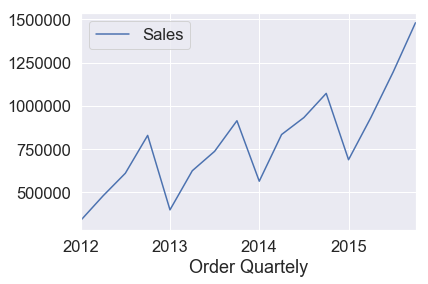

In [44]:
df_monthly_sale.resample("q",convention="end").sum().plot() #quarterly sale 
plt.xlabel("Order Quartely")

Text(0.5,0,'Monthly Order')

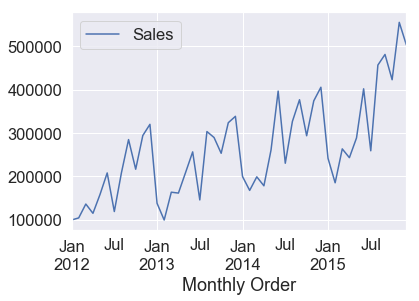

In [45]:
df_monthly_sale.resample("m",convention="end").sum().plot() #Monthlysale 
plt.xlabel("Monthly Order")

In [129]:
df_monthly_sale1=df_monthly_sale.resample("m",convention="end").sum()  #monthly sales 
df_monthly_sale1["Sales growth rate"]=df_monthly_sale1["Sales"].pct_change()*100 #percentage change in growth
df_monthly_sale1.fillna(0,inplace=True) #filling null values with 0
df_monthly_sale1.loc[df_monthly_sale1["Sales growth rate"]<0] #filtering of negative sales growth

,Sales,Sales growth rate
Order Date,,
2012-04-30,114332.96,-15.77
2012-07-31,118434.88,-42.94
2012-10-31,216114.57,-24.06
2013-01-31,137435.98,-57.03
2013-02-28,98854.96,-28.07
2013-04-30,161052.27,-1.24
2013-07-31,145236.79,-43.31
2013-09-30,289389.17,-4.54
2013-10-31,252939.85,-12.60


In [151]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_sale=df.pivot_table(values="Sales",index=("Category","Sub-Category"),aggfunc="sum")
df_loss_sale=pd.merge(df_loss1,df_sale,left_index=True,right_index=True)
df_loss_sale["Percentage loss"]=-(df_loss_sale["Profit"]/df_loss_sale["Sales"])*100 #loss per sale
df_loss_sale

Profit      Sales  Percentage loss
Category        Sub-Category                                       
Furniture       Bookcases    -101446.30 1466572.24             6.92
                Chairs        -96084.90 1501681.76             6.40
                Furnishings   -28490.72  385155.97             7.40
                Tables       -144123.15  757041.92            19.04
Office Supplies Appliances    -63985.35 1010535.52             6.33
                Art           -21660.63  371613.15             5.83
                Binders       -52884.06  461869.39            11.45
                Envelopes     -10863.57  169217.49             6.42
                Fasteners      -6314.90   89495.05             7.06
                Labels         -3760.77   73350.28             5.13
                Paper         -10299.49  241787.53             4.26
                Storage       -76063.98 1126812.97             6.75
                Supplies      -18172.96  242811.13             7.48
Technology      Accessories   -39857.50  749237.02             5.32
                Copiers       -71547.50 1509436.27             4.74
                Machines      -78672.74  779060.07            10.10
                Phones        -96417.66 1706824.14             5.65

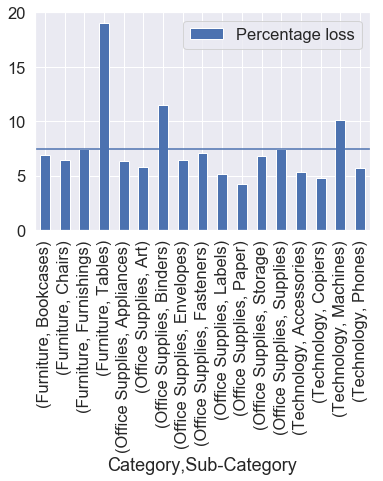

In [37]:
df_loss_sale.plot(y="Percentage loss",kind="bar") #bar graph on percentage loss
plt.axhline(y=df_loss_sale["Percentage loss"].mean()) #finding average loss


# Building predictive model for time series(AREMA model)

In [152]:
!pip install pmdarima

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\admin\\anaconda3\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ------------------------------------ 568.6/568.6 kB 730.8 kB/s eta 0:00:00
     -------------------------------------- 987.3/987.3 kB 1.4 MB/s eta 0:00:00
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Using cached statsmodels-0.13.5-cp37-cp37m-win_amd64.whl (9.1 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


In [153]:
df

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-11-11,CA-2014-AB10015140-41954,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.00,Oklahoma City,Oklahoma,United States,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.77,High,14/11
2014-02-05,IN-2014-JR162107-41675,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,10035.00,Wollongong,New South Wales,Australia,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical,14/02
2014-10-17,IN-2014-CR127307-41929,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,10035.00,Brisbane,Queensland,Australia,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium,14/10
2014-01-28,ES-2014-KM1637548-41667,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,10035.00,Berlin,Berlin,Germany,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium,14/01
2014-11-05,SG-2014-RH9495111-41948,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,10035.00,Dakar,Dakar,Senegal,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical,14/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-19,IN-2015-KE1642066-42174,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,10035.00,Kure,Hiroshima,Japan,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.00,4.50,1.01,Medium,15/06
2014-05-06,US-2014-ZD21925140-41765,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.00,Chattanooga,Tennessee,United States,...,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.20,3.34,1.93,High,14/05
2012-08-26,CA-2012-ZD21925140-41147,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.00,San Francisco,California,United States,...,Office Supplies,Art,Newell 341,8.56,2,0.00,2.48,1.58,High,12/08


In [155]:
!pip install pmdarima

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\admin\\anaconda3\\lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached pmdarima-2.0.2-cp37-cp37m-win_amd64.whl (568 kB)
  Using cached statsmodels-0.13.5-cp37-cp37m-win_amd64.whl (9.1 MB)
  Using cached Cython-0.29.33-py2.py3-none-any.whl (987 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.0
    Uninstalling patsy-0.5.0:
      Successfully uninstalled patsy-0.5.0
  Attempting uninstall: Cython
    Found existing installation: Cython 0.28.5
    Uninstalling Cython-0.28.5:
      Successfully uninstalled Cython-0.28.5
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0
